In [1]:
#SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("maas.csv")

In [3]:
dataset.isnull().sum()

pozisyon    0
seviye      0
maas        0
dtype: int64

In [4]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

Veri setimizdeki bilgi az olduğundan eğitim ve test verisi olarak ayırmıyoruz.
### SVR ile modelimizi eğitelim

In [5]:
from sklearn.svm import SVR
# RBF Kernel özellikleri daha yüksek bir boyuta çekerek doğrusal bir karaar sınırı oluşturur. 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### SVR sonuçlarını gözlemleyelim

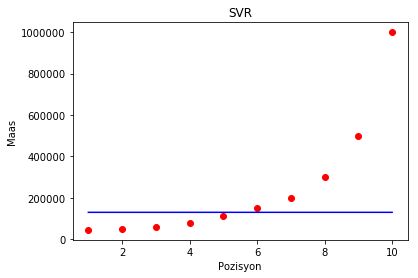

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

In [7]:
y_pred = regressor.predict(8)
y_pred

array([ 130001.77226664])


** Modelimiz tarafından oluşturulan bağıntı yukarıda ki grafikte görülmektedir. Fakat bu model ile çok kötü tahmin yapmamız kaçınılmazdır. Bunun sebebi ise birçok regression modelinin aksine SVR'da feature scaling yoktur. Bunun için özelliklerimiz scale etmmemiz gerekir. 

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Users\ceakn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\ceakn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\ceakn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [9]:
from sklearn.svm import SVR
# RBF Kernel özellikleri daha yüksek bir boyuta çekerek doğrusal bir karar sınırı oluşturur. 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

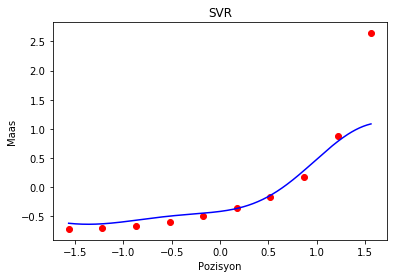

In [13]:
X_grid = np.arange(min(X), max(X), 0.01) # veri setimiz ölçelendirildiğinde 0.01 olarak artırma yaptık.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

In [11]:
y_pred = regressor.predict(7)
y_pred

array([ 0.01158103])

7.seviyedeki bir kişinin maaşını 0.01158 olarak tahmin etti. Bunun sebebi gerçek değerleri ölçeklendirmemiz.(Scale)
Gergek değere ulaşmak için scale ettiğimiz değerin tersini almamız gerekiyor. 10.seviyedki kişi ise bu alanların dışında outlier olarak gözüküyor.

In [14]:
y_pred = regressor.predict(7)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([ 252789.13920847])